[Consigna del trabajo practico](https://palermo.blackboard.com/ultra/courses/_79180_1/outline/edit/document/_4342914_1?courseId=_79180_1&view=content&state=view)

# Desarrollo
Para el desarrollo del trabajo pr√°ctico, el grupo de alumnos deber√° elegir uno de los conjuntos de datos disponibles:

- Canciones de Spotify (clasificaci√≥n).
- Satisfacci√≥n en vuelos de aerol√≠neas (clasificaci√≥n).
- Precios de viviendas (regresi√≥n).

Una vez definido el conjunto de datos para trabajar se deber√°n seguir los siguientes hitos:

- 1EDA (an√°lisis exploratorio de datos). Debe presentarse en formato Jupyter Notebooks y debe tener conclusiones de los an√°lisis realizados.
- Jupyter Notebook de entrenamiento de modelos. Se deben entrenar al menos 3 algoritmos diferentes y se debe elegir y justificar cu√°l deber√≠a ser el modelo utilizado en producci√≥n.
- Presentaci√≥n final de resultados. Se espera una conclusi√≥n final del trabajo realizado.

Dentro de la cursada se encuentran planificadas dos fechas de entregas, en donde los grupos tendr√°n que cumplir con ciertos lineamientos.

# Entregas

## Entrega de etapa 1 del TP integrador

Los grupos deber√°n presentar Jupyter Notebook (.ipynb) que contenga:

    Descripci√≥n del problema o situaci√≥n a resolver en el dataset.
    An√°lisis exploratorio de datos (EDA por sus siglas en ingl√©s). En el apartado de EDA se detallan los elementos requeridos y deseables. Adem√°s de gr√°ficos, se espera que se expliquen los hallazgos encontrados.

## Entrega final del TP Integrador

Los grupos deber√°n presentar Jupyter Notebook (.ipynb) que contenga:

    Entrenamiento de 3 modelos.
    Conclusiones de la performance de los modelos.

# Requerimientos para las entregas

## Entrega de etapa 1 del TP Integrador

### Requerido:

    Distribuciones de las variables.
    An√°lisis / imputaci√≥n de valores nulos.
    An√°lisis valores extremos (Outliers).
    Relaci√≥n de features con el target.

### Deseable:

    Correlaciones entre variables.

## Entrega de final del TP integrador

### Requerido:

    Metodolog√≠a de resoluci√≥n.
    Separaci√≥n en datos de entrenamiento y validaci√≥n.
    Elecci√≥n de m√©trica.
    Entrenamiento de al menos 3 modelos distintos.
    Matriz de confusi√≥n (clasificaci√≥n) / residual plot (regresi√≥n).

### Deseable:

    Pipelines.
    Tuneo de hiper par√°metros. 
    M√©todos Oversampling y Undersampling (aplica cuando la proporci√≥n de una clase es baja).

# Entrega final del TP integrador y defensa oral sincr√≥nica

Se espera que los grupos hagan una presentaci√≥n (Power Point o similar) del problema resuelto usando machine learning. El foco debe prestarse basado en los siguientes 3 pilares:

    Problema o iniciativa tratada.
    Enfoque de resoluci√≥n (metodolog√≠a y t√©cnicas aplicadas).
    Evaluaci√≥n de resultados.

In [46]:
# Loading dataset

dataset_60s = pd.read_csv('./dataset/dataset-of-60s.csv')
dataset_70s = pd.read_csv('./dataset/dataset-of-70s.csv')
dataset_80s = pd.read_csv('./dataset/dataset-of-80s.csv')
dataset_90s = pd.read_csv('./dataset/dataset-of-90s.csv')
dataset_00s = pd.read_csv('./dataset/dataset-of-00s.csv')
dataset_10s = pd.read_csv('./dataset/dataset-of-10s.csv')

# Adding a decade column for future analysis
dataset_60s['decade'] = '60'
dataset_70s['decade'] = '70'
dataset_80s['decade'] = '80'
dataset_90s['decade'] = '90'
dataset_00s['decade'] = '00'
dataset_10s['decade'] = '10'

# Merging all decades into a single dataset
dataset = pd.concat([dataset_60s, dataset_70s, dataset_80s, dataset_90s, dataset_00s, dataset_10s], ignore_index=True)

# Shuffle the dataset so the decades are mixed
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Descripci√≥n del Problema

## Objetivo del Proyecto
Este proyecto tiene como objetivo desarrollar un modelo de machine learning capaz de **clasificar canciones de Spotify por d√©cada** bas√°ndose en sus caracter√≠sticas musicales. El dataset contiene canciones de las d√©cadas de los 60s, 70s, 80s, 90s, 00s y 10s.

## Problema a Resolver
¬øEs posible predecir la d√©cada de una canci√≥n bas√°ndose √∫nicamente en sus caracter√≠sticas musicales como tempo, energ√≠a, valencia, etc.? Esta informaci√≥n podr√≠a ser √∫til para:
- Sistemas de recomendaci√≥n musical
- An√°lisis de tendencias musicales a trav√©s del tiempo
- Clasificaci√≥n autom√°tica de m√∫sica vintage

## Dataset
El dataset est√° compuesto por canciones de 6 d√©cadas diferentes, cada una con diversas caracter√≠sticas musicales proporcionadas por la API de Spotify.

In [47]:
# Additional imports for EDA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

# Exploraci√≥n Inicial del Dataset

In [ ]:
# Informaci√≥n b√°sica del dataset
print("=== INFORMACI√ìN GENERAL DEL DATASET ===")
print(f"Forma del dataset: {dataset.shape}")
print(f"N√∫mero de canciones: {len(dataset)}")
print(f"N√∫mero de caracter√≠sticas: {len(dataset.columns)}")
print("\n=== PRIMERAS 5 FILAS ===")
display(dataset.head())

print("\n=== DISTRIBUCI√ìN POR D√âCADA ===")
decade_counts = dataset['decade'].value_counts().sort_index()
print(decade_counts)
print(f"\nPorcentajes por d√©cada:")
print((decade_counts / len(dataset) * 100).round(2))

=== INFORMACI√ìN GENERAL DEL DATASET ===
Forma del dataset: (41106, 20)
N√∫mero de canciones: 41106
N√∫mero de caracter√≠sticas: 20

=== PRIMERAS 5 FILAS ===


track           artist  \
0      Nachtlager N. Granada - The Lower Castle Yard      Traditional   
1                               How's It Going To Be  Third Eye Blind   
2                                  Heavenly Perverse     Dimmu Borgir   
3  Era um Garoto Que Como Eu Amava os Beatles e o...     Os Incr√≠veis   
4                                   Clavel Sevillano     Javier Sol√≠s   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:16BjtTPPOnzv83TQWrnQQf         0.530   0.592   10   -16.461   
1  spotify:track:3Uvx1TO0Kg5HgGPk58lHXv         0.562   0.593    5    -9.362   
2  spotify:track:1J1Z0XIL18hClKmm5T5ytO         0.138   0.981    4    -3.797   
3  spotify:track:0mrP69xWBmlnixuVLFqCSl         0.536   0.713    4    -9.203   
4  spotify:track:15fxd1I7i8BFsZhKwoKANr         0.296   0.462    0    -9.521   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0366      0.942000           0.93300    0.3930   0.9160   
1     1       0.0263      0.003270           0.00139    0.0967   0.5740   
2     1       0.1160      0.000016           0.81400    0.0703   0.0399   
3     1       0.0679      0.251000           0.00000    0.9480   0.7720   
4     1       0.0362      0.782000           0.00000    0.6320   0.4430   

     tempo  duration_ms  time_signature  chorus_hit  sections  target decade  
0  148.098        83400               4    21.26378         6       0     70  
1   80.289       253413               4    22.58257         8       1     90  
2   97.579       392813               3    19.71308        15       0     00  
3  128.594       209947               4    66.80246         8       0     70  
4  141.942       226000               3    36.35407         8       0     60


=== DISTRIBUCI√ìN POR D√âCADA ===
decade
00    5872
10    6398
60    8642
70    7766
80    6908
90    5520
Name: count, dtype: int64

Porcentajes por d√©cada:
decade
00    14.29
10    15.56
60    21.02
70    18.89
80    16.81
90    13.43
Name: count, dtype: float64


In [57]:
# An√°lisis de valores nulos
print("=== AN√ÅLISIS DE VALORES NULOS ===")
null_values = dataset.isnull().sum()
print("Valores nulos por columna:")
for col, null_count in null_values.items():
    if null_count > 0:
        print(f"{col}: {null_count} ({null_count/len(dataset)*100:.2f}%)")
    
if null_values.sum() == 0:
    print("‚úÖ No hay valores nulos en el dataset")

print(f"\n=== AN√ÅLISIS DE DUPLICADOS ===")
duplicates = dataset.duplicated().sum()
print(f"N√∫mero de filas duplicadas: {duplicates}")

if duplicates > 0:
    print(f"Porcentaje de duplicados: {duplicates/len(dataset)*100:.2f}%")
else:
    print("‚úÖ No hay filas duplicadas en el dataset")

# Verificar duplicados por track y artist
track_artist_duplicates = dataset.duplicated(subset=['track', 'artist']).sum()
print(f"Canciones duplicadas (mismo track y artist): {track_artist_duplicates}")

print(f"\n=== ESTAD√çSTICAS DESCRIPTIVAS ===")
dataset.describe()

=== AN√ÅLISIS DE VALORES NULOS ===
Valores nulos por columna:
‚úÖ No hay valores nulos en el dataset

=== AN√ÅLISIS DE DUPLICADOS ===
N√∫mero de filas duplicadas: 0
‚úÖ No hay filas duplicadas en el dataset
Canciones duplicadas (mismo track y artist): 1103

=== ESTAD√çSTICAS DESCRIPTIVAS ===


danceability        energy           key      loudness          mode  \
count  41106.000000  41106.000000  41106.000000  41106.000000  41106.000000   
mean       0.539695      0.579545      5.213594    -10.221525      0.693354   
std        0.177821      0.252628      3.534977      5.311626      0.461107   
min        0.000000      0.000251      0.000000    -49.253000      0.000000   
25%        0.420000      0.396000      2.000000    -12.816000      0.000000   
50%        0.552000      0.601000      5.000000     -9.257000      1.000000   
75%        0.669000      0.787000      8.000000     -6.374250      1.000000   
max        0.988000      1.000000     11.000000      3.744000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  41106.000000  41106.000000      41106.000000  41106.000000   
mean       0.072960      0.364197          0.154416      0.201535   
std        0.086112      0.338913          0.303530      0.172959   
min        0.000000      0.000000          0.000000      0.013000   
25%        0.033700      0.039400          0.000000      0.094000   
50%        0.043400      0.258000          0.000120      0.132000   
75%        0.069800      0.676000          0.061250      0.261000   
max        0.960000      0.996000          1.000000      0.999000   

            valence         tempo   duration_ms  time_signature    chorus_hit  \
count  41106.000000  41106.000000  4.110600e+04    41106.000000  41106.000000   
mean       0.542440    119.338249  2.348776e+05        3.893689     40.106041   
std        0.267329     29.098845  1.189674e+05        0.423073     19.005515   
min        0.000000      0.000000  1.516800e+04        0.000000      0.000000   
25%        0.330000     97.397000  1.729278e+05        4.000000     27.599792   
50%        0.558000    117.565000  2.179070e+05        4.000000     35.850795   
75%        0.768000    136.494000  2.667730e+05        4.000000     47.625615   
max        0.996000    241.423000  4.170227e+06        5.000000    433.182000   

           sections        target  
count  41106.000000  41106.000000  
mean      10.475673      0.500000  
std        4.871850      0.500006  
min        0.000000      0.000000  
25%        8.000000      0.000000  
50%       10.000000      0.500000  
75%       12.000000      1.000000  
max      169.000000      1.000000

# An√°lisis Exploratorio de Datos (EDA)

## 1. An√°lisis Univariado

El an√°lisis univariado examina cada variable de forma individual para entender su distribuci√≥n, tendencia central y dispersi√≥n.

=== AN√ÅLISIS DE LA VARIABLE TARGET (D√âCADA) ===
Esta es una variable categ√≥rica que representa la d√©cada de cada canci√≥n


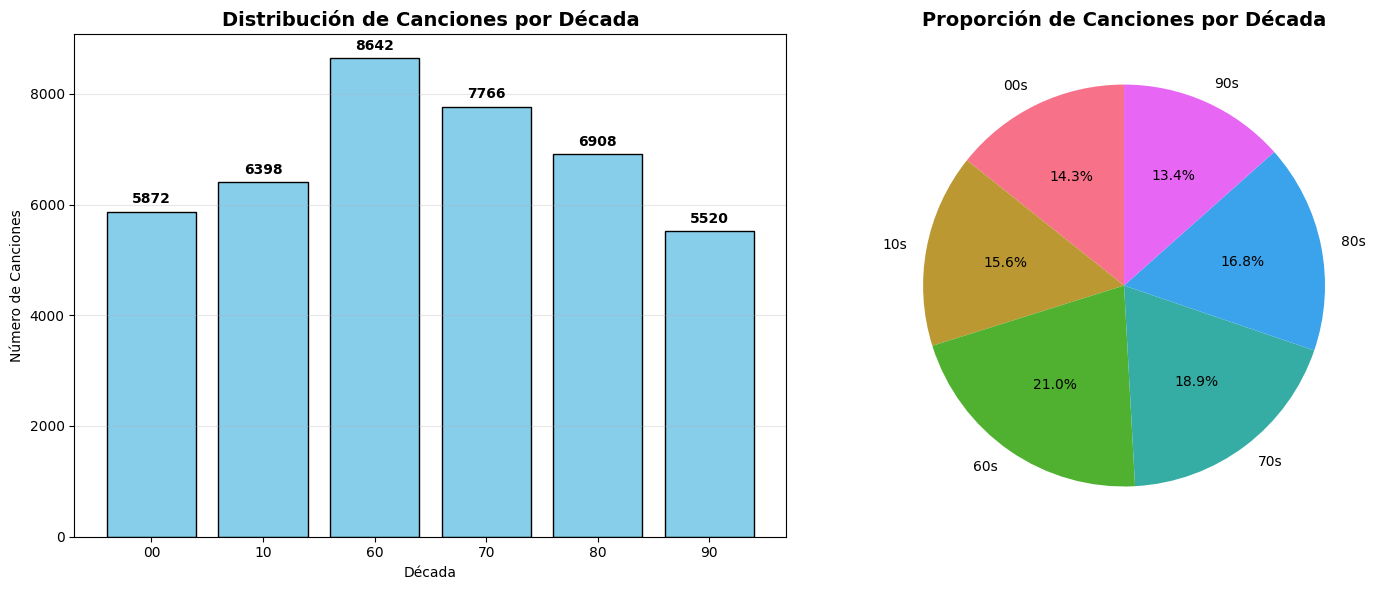


Moda (d√©cada m√°s frecuente): 60s
Frecuencia de la moda: 8642 canciones
Porcentaje de la moda: 21.02%


In [60]:
# An√°lisis de la variable target (d√©cada)
print("=== AN√ÅLISIS DE LA VARIABLE TARGET (D√âCADA) ===")
print("Esta es una variable categ√≥rica que representa la d√©cada de cada canci√≥n")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gr√°fico de barras
decade_counts = dataset['decade'].value_counts().sort_index()
ax1.bar(decade_counts.index, decade_counts.values, color='skyblue', edgecolor='black')
ax1.set_title('Distribuci√≥n de Canciones por D√©cada', fontsize=14, fontweight='bold')
ax1.set_xlabel('D√©cada')
ax1.set_ylabel('N√∫mero de Canciones')
ax1.grid(axis='y', alpha=0.3)

# Agregar valores sobre las barras
for i, v in enumerate(decade_counts.values):
    ax1.text(i, v + 100, str(v), ha='center', va='bottom', fontweight='bold')

# Gr√°fico de pastel
ax2.pie(decade_counts.values, labels=[f"{decade}s" for decade in decade_counts.index], 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", len(decade_counts)))
ax2.set_title('Proporci√≥n de Canciones por D√©cada', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Medidas de tendencia central para variable categ√≥rica
print(f"\nModa (d√©cada m√°s frecuente): {dataset['decade'].mode()[0]}s")
print(f"Frecuencia de la moda: {decade_counts.max()} canciones")
print(f"Porcentaje de la moda: {decade_counts.max()/len(dataset)*100:.2f}%")

In [51]:
# An√°lisis de variables num√©ricas
print("=== AN√ÅLISIS DE VARIABLES NUM√âRICAS ===")

# Seleccionar solo variables num√©ricas excluyendo las categ√≥ricas
numeric_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()
# Excluir target ya que es categ√≥rico aunque est√© codificado como num√©rico
if 'target' in numeric_cols:
    numeric_cols.remove('target')

print(f"Variables num√©ricas a analizar: {len(numeric_cols)}")
print(f"Columnas: {numeric_cols}")

# Crear funci√≥n para calcular medidas de tendencia central y dispersi√≥n
def analyze_numeric_variable(data, column):
    """Funci√≥n para analizar una variable num√©rica individual"""
    col_data = data[column]
    
    # Medidas de tendencia central
    mean_val = col_data.mean()
    median_val = col_data.median()
    mode_val = col_data.mode()[0] if len(col_data.mode()) > 0 else "N/A"
    
    # Medidas de dispersi√≥n
    std_val = col_data.std()
    var_val = col_data.var()
    q1 = col_data.quantile(0.25)
    q3 = col_data.quantile(0.75)
    iqr = q3 - q1
    
    # Detecci√≥n de outliers usando IQR
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
    
    return {
        'mean': mean_val,
        'median': median_val,
        'mode': mode_val,
        'std': std_val,
        'variance': var_val,
        'q1': q1,
        'q3': q3,
        'iqr': iqr,
        'outliers_count': len(outliers),
        'outliers_percentage': len(outliers) / len(col_data) * 100
    }

# An√°lisis por variable
analysis_results = {}
for col in numeric_cols:
    analysis_results[col] = analyze_numeric_variable(dataset, col)

# Mostrar resumen
summary_df = pd.DataFrame(analysis_results).T
summary_df = summary_df.round(4)
print("\n=== RESUMEN DE MEDIDAS ESTAD√çSTICAS ===")
display(summary_df)

=== AN√ÅLISIS DE VARIABLES NUM√âRICAS ===
Variables num√©ricas a analizar: 15
Columnas: ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections']

=== RESUMEN DE MEDIDAS ESTAD√çSTICAS ===

=== RESUMEN DE MEDIDAS ESTAD√çSTICAS ===


mean       median         mode          std  \
danceability           0.5397       0.5520       0.6200       0.1778   
energy                 0.5795       0.6010       0.6410       0.2526   
key                    5.2136       5.0000       0.0000       3.5350   
loudness             -10.2215      -9.2570      -8.1420       5.3116   
mode                   0.6934       1.0000       1.0000       0.4611   
speechiness            0.0730       0.0434       0.0331       0.0861   
acousticness           0.3642       0.2580       0.9950       0.3389   
instrumentalness       0.1544       0.0001       0.0000       0.3035   
liveness               0.2015       0.1320       0.1110       0.1730   
valence                0.5424       0.5580       0.9610       0.2673   
tempo                119.3382     117.5650     119.9930      29.0988   
duration_ms       234877.5505  217907.0000  192000.0000  118967.3983   
time_signature         3.8937       4.0000       4.0000       0.4231   
chorus_hit            40.1060      35.8508       0.0000      19.0055   
sections              10.4757      10.0000       9.0000       4.8719   

                      variance           q1           q3         iqr  \
danceability      3.160000e-02       0.4200       0.6690      0.2490   
energy            6.380000e-02       0.3960       0.7870      0.3910   
key               1.249610e+01       2.0000       8.0000      6.0000   
loudness          2.821340e+01     -12.8160      -6.3742      6.4418   
mode              2.126000e-01       0.0000       1.0000      1.0000   
speechiness       7.400000e-03       0.0337       0.0698      0.0361   
acousticness      1.149000e-01       0.0394       0.6760      0.6366   
instrumentalness  9.210000e-02       0.0000       0.0612      0.0612   
liveness          2.990000e-02       0.0940       0.2610      0.1670   
valence           7.150000e-02       0.3300       0.7680      0.4380   
tempo             8.467428e+02      97.3970     136.4940     39.0970   
duration_ms       1.415324e+10  172927.7500  266773.0000  93845.2500   
time_signature    1.790000e-01       4.0000       4.0000      0.0000   
chorus_hit        3.612096e+02      27.5998      47.6256     20.0258   
sections          2.373490e+01       8.0000      12.0000      4.0000   

                  outliers_count  outliers_percentage  
danceability                 1.0               0.0024  
energy                       0.0               0.0000  
key                          0.0               0.0000  
loudness                  1343.0               3.2672  
mode                         0.0               0.0000  
speechiness               5088.0              12.3778  
acousticness                 0.0               0.0000  
instrumentalness          8920.0              21.7000  
liveness                  2688.0               6.5392  
valence                      0.0               0.0000  
tempo                      434.0               1.0558  
duration_ms               1987.0               4.8338  
time_signature            4809.0              11.6990  
chorus_hit                1839.0               4.4738  
sections                  1570.0               3.8194

=== DISTRIBUCIONES DE VARIABLES NUM√âRICAS ===


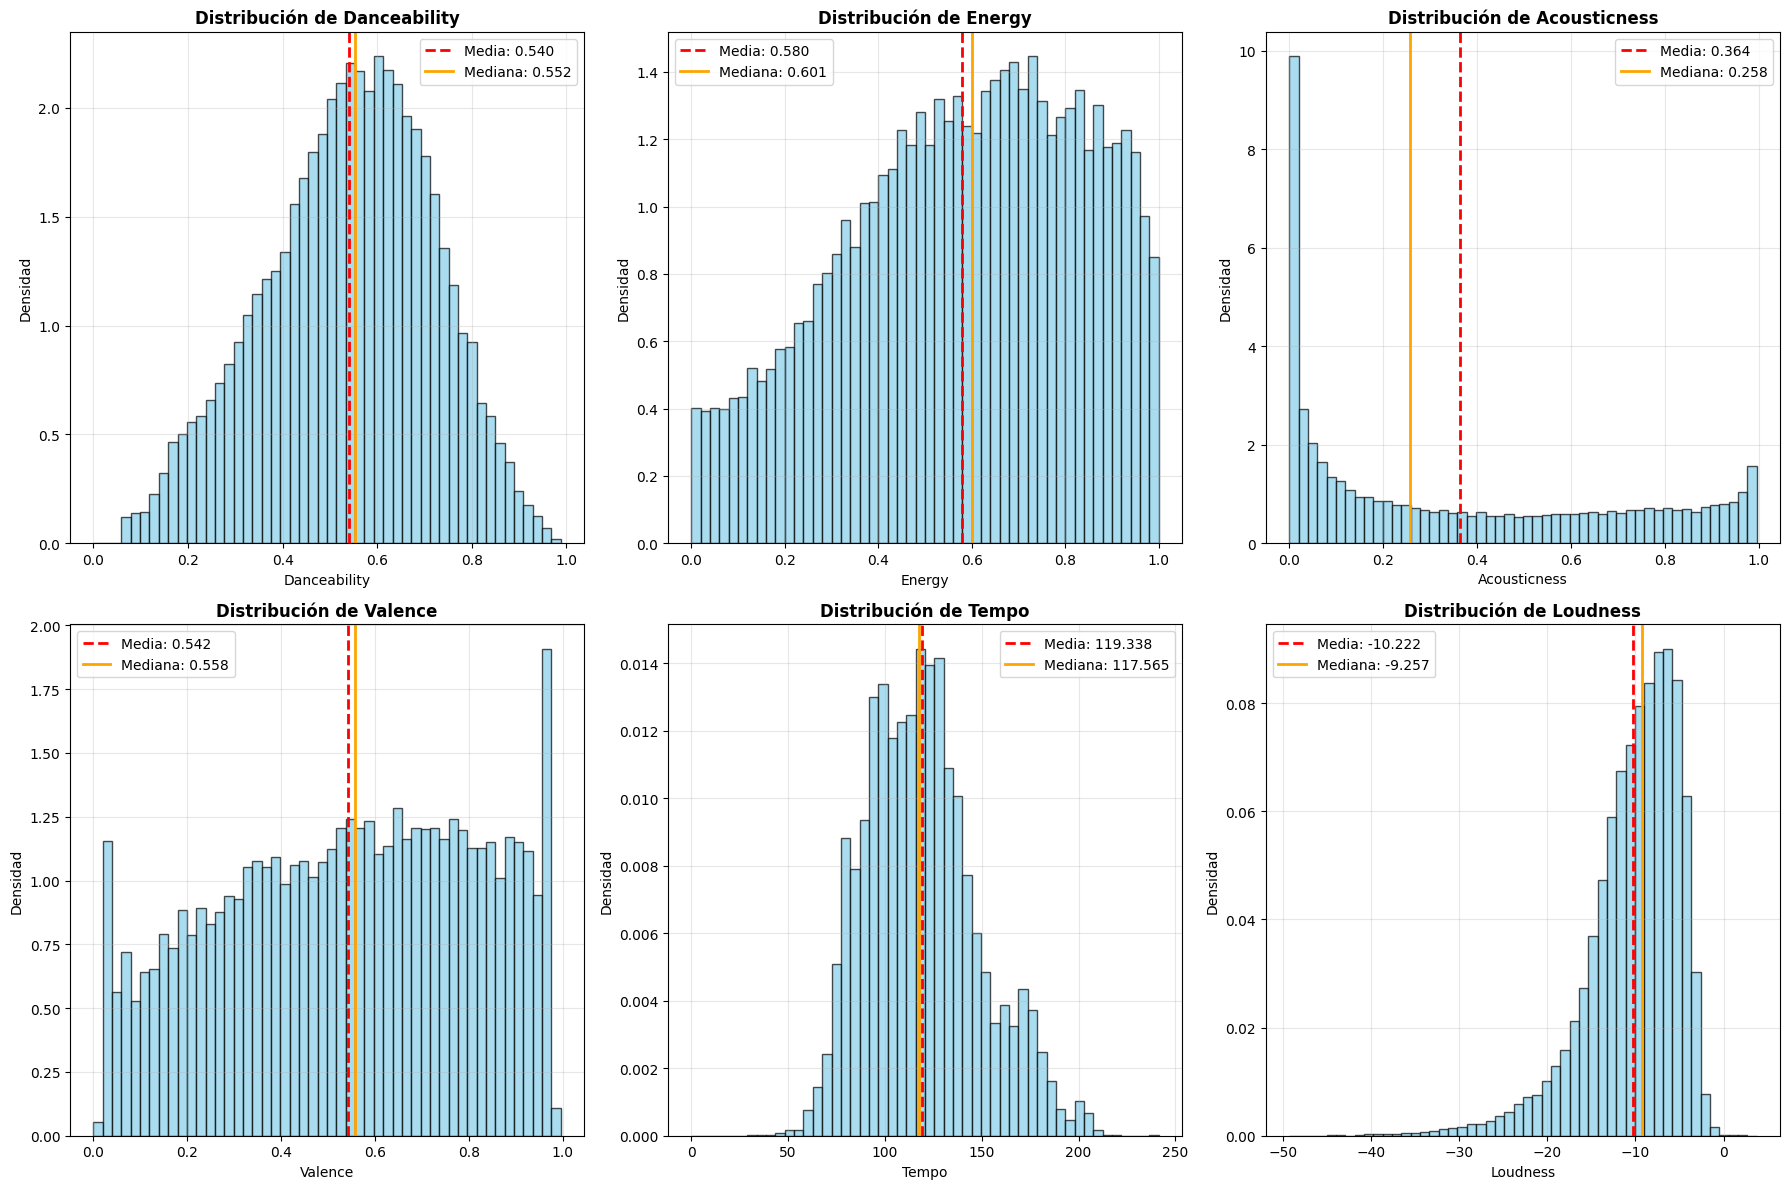


=== AN√ÅLISIS DE ASIMETR√çA ===
danceability: Skewness = -0.252 -> aproximadamente sim√©trica
  Media: 0.540, Mediana: 0.552, Diferencia: 0.012

energy: Skewness = -0.320 -> aproximadamente sim√©trica
  Media: 0.580, Mediana: 0.601, Diferencia: 0.021

acousticness: Skewness = 0.493 -> aproximadamente sim√©trica
  Media: 0.364, Mediana: 0.258, Diferencia: 0.106

valence: Skewness = -0.180 -> aproximadamente sim√©trica
  Media: 0.542, Mediana: 0.558, Diferencia: 0.016

tempo: Skewness = 0.485 -> aproximadamente sim√©trica
  Media: 119.338, Mediana: 117.565, Diferencia: 1.773

loudness: Skewness = -1.415 -> asim√©trica negativa (cola izquierda)
  Media: -10.222, Mediana: -9.257, Diferencia: 0.965



In [52]:
# Visualizaciones de distribuciones univariadas
print("=== DISTRIBUCIONES DE VARIABLES NUM√âRICAS ===")

# Variables principales de caracter√≠sticas musicales de Spotify
main_features = ['danceability', 'energy', 'acousticness', 'valence', 'tempo', 'loudness']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(main_features):
    # Histograma con curva de densidad
    axes[i].hist(dataset[col], bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    
    # Agregar l√≠neas de media y mediana
    mean_val = dataset[col].mean()
    median_val = dataset[col].median()
    
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.3f}')
    axes[i].axvline(median_val, color='orange', linestyle='-', linewidth=2, label=f'Mediana: {median_val:.3f}')
    
    axes[i].set_title(f'Distribuci√≥n de {col.capitalize()}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Densidad')
    axes[i].legend()
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# An√°lisis de asimetr√≠a
print("\n=== AN√ÅLISIS DE ASIMETR√çA ===")
for col in main_features:
    skewness = stats.skew(dataset[col])
    mean_val = dataset[col].mean()
    median_val = dataset[col].median()
    
    if abs(skewness) < 0.5:
        dist_type = "aproximadamente sim√©trica"
    elif skewness > 0.5:
        dist_type = "asim√©trica positiva (cola derecha)"
    else:
        dist_type = "asim√©trica negativa (cola izquierda)"
    
    print(f"{col}: Skewness = {skewness:.3f} -> {dist_type}")
    print(f"  Media: {mean_val:.3f}, Mediana: {median_val:.3f}, Diferencia: {abs(mean_val-median_val):.3f}")
    print()

=== AN√ÅLISIS DE VALORES EXTREMOS (OUTLIERS) ===


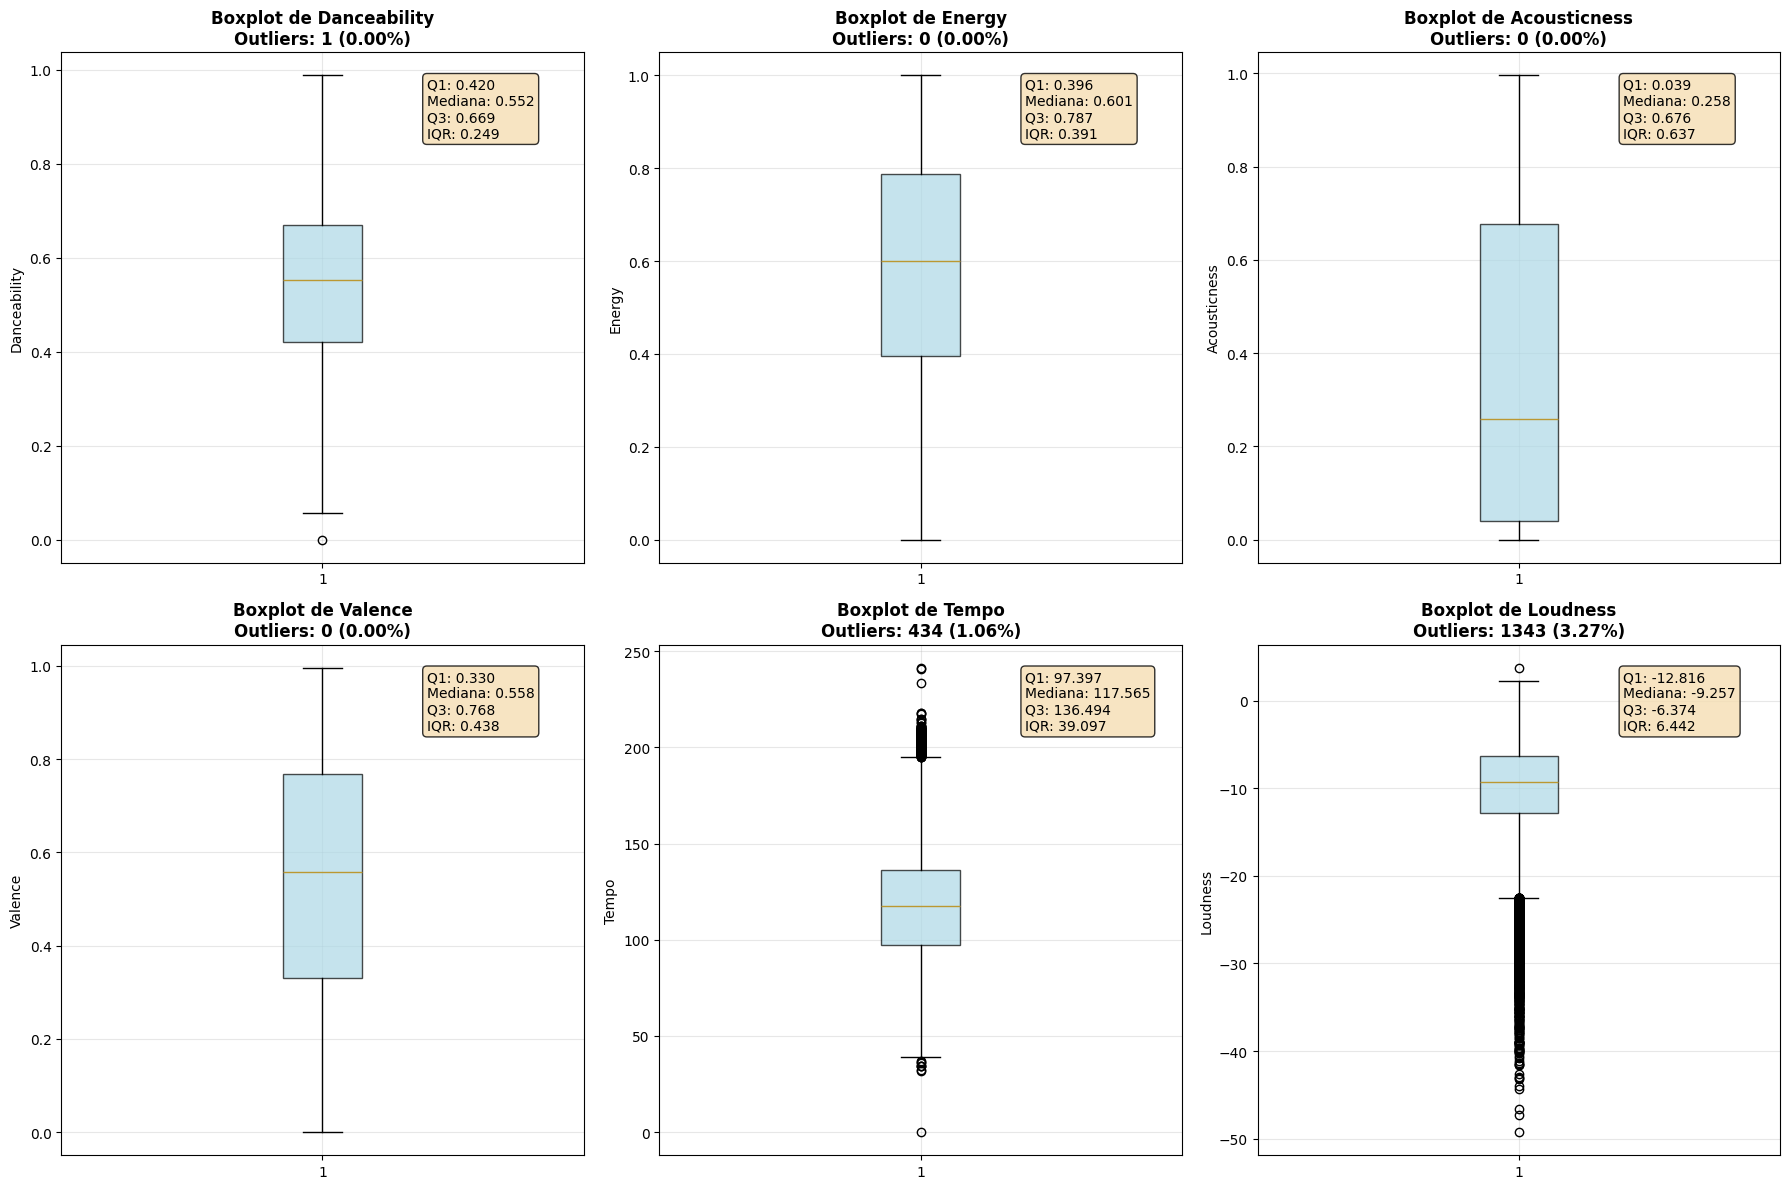


=== RESUMEN DE OUTLIERS ===


Variable  Total_Outliers Porcentaje Limite_Inferior Limite_Superior
0  danceability               1      0.00%           0.046           1.042
1        energy               0      0.00%          -0.191           1.373
2  acousticness               0      0.00%          -0.916           1.631
3       valence               0      0.00%          -0.327           1.425
4         tempo             434      1.06%          38.752         195.139
5      loudness            1343      3.27%         -22.479           3.288

In [53]:
# An√°lisis de valores extremos (Outliers) con Boxplots
print("=== AN√ÅLISIS DE VALORES EXTREMOS (OUTLIERS) ===")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(main_features):
    # Boxplot
    bp = axes[i].boxplot(dataset[col], patch_artist=True, showfliers=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha(0.7)
    
    # Estad√≠sticas del boxplot
    q1 = dataset[col].quantile(0.25)
    median = dataset[col].median()
    q3 = dataset[col].quantile(0.75)
    iqr = q3 - q1
    
    # Calcular outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = dataset[col][(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    
    axes[i].set_title(f'Boxplot de {col.capitalize()}\nOutliers: {len(outliers)} ({len(outliers)/len(dataset)*100:.2f}%)', 
                     fontsize=12, fontweight='bold')
    axes[i].set_ylabel(col.capitalize())
    axes[i].grid(alpha=0.3)
    
    # Agregar texto con estad√≠sticas
    stats_text = f'Q1: {q1:.3f}\nMediana: {median:.3f}\nQ3: {q3:.3f}\nIQR: {iqr:.3f}'
    axes[i].text(0.7, 0.95, stats_text, transform=axes[i].transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Resumen de outliers por variable
print("\n=== RESUMEN DE OUTLIERS ===")
outlier_summary = []
for col in main_features:
    q1 = dataset[col].quantile(0.25)
    q3 = dataset[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = dataset[col][(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    
    outlier_summary.append({
        'Variable': col,
        'Total_Outliers': len(outliers),
        'Porcentaje': f"{len(outliers)/len(dataset)*100:.2f}%",
        'Limite_Inferior': f"{lower_bound:.3f}",
        'Limite_Superior': f"{upper_bound:.3f}"
    })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)

## 2. An√°lisis Bivariado

El an√°lisis bivariado examina la relaci√≥n entre dos variables. En nuestro caso, nos enfocaremos en:
1. **Relaci√≥n de caracter√≠sticas musicales con la variable target (d√©cada)**
2. **Correlaciones entre variables num√©ricas**

=== RELACI√ìN DE CARACTER√çSTICAS CON LA D√âCADA ===


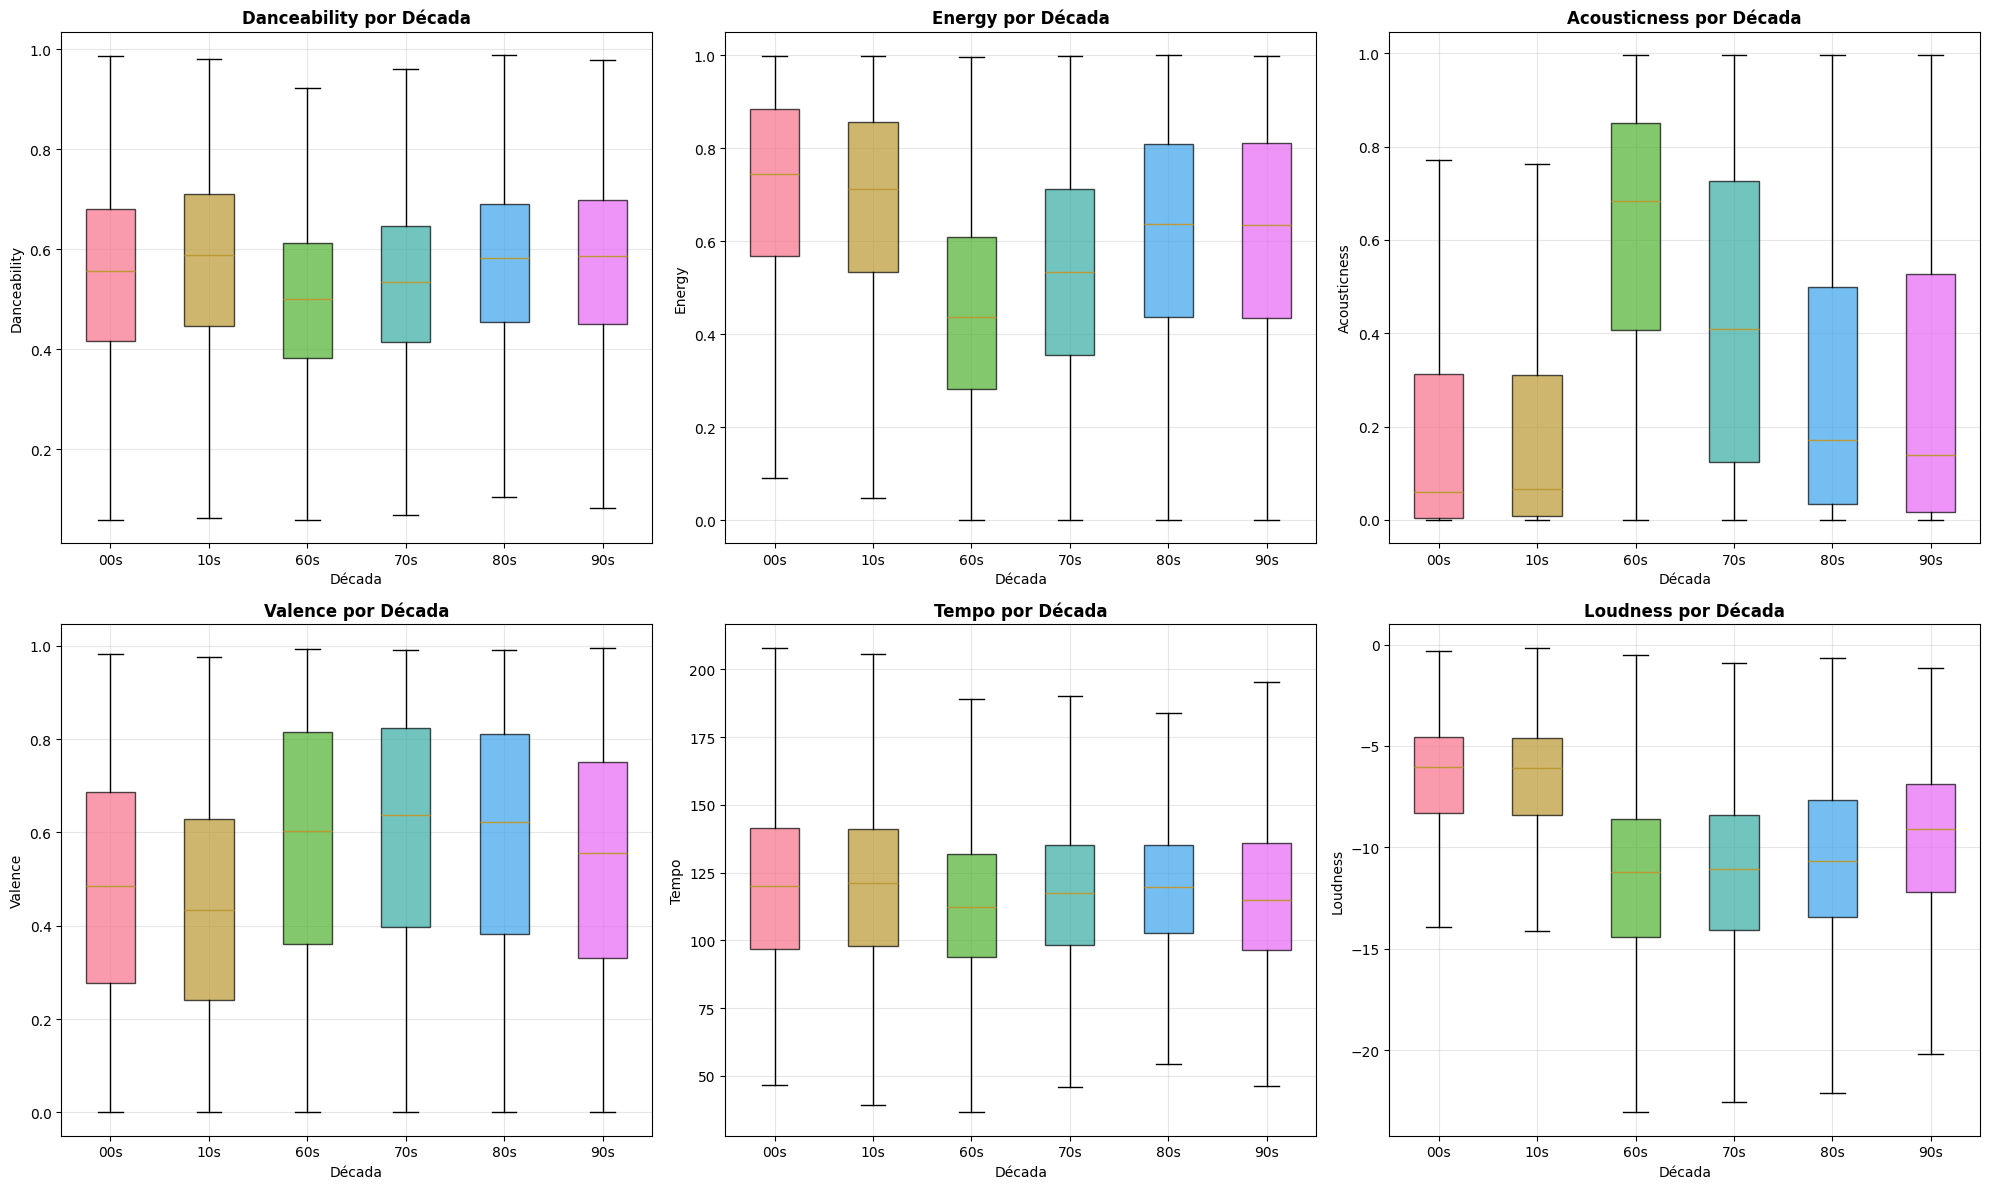


=== ESTAD√çSTICAS POR D√âCADA ===

--- DANCEABILITY ---


mean  median    std
decade                      
00      0.543   0.556  0.190
10      0.568   0.588  0.191
60      0.492   0.501  0.162
70      0.526   0.534  0.163
80      0.564   0.582  0.173
90      0.567   0.586  0.180


--- ENERGY ---


mean  median    std
decade                      
00      0.695   0.744  0.238
10      0.668   0.712  0.241
60      0.445   0.436  0.220
70      0.528   0.533  0.235
80      0.608   0.637  0.243
90      0.602   0.635  0.252


--- ACOUSTICNESS ---


mean  median    std
decade                      
00      0.214   0.060  0.297
10      0.217   0.067  0.297
60      0.616   0.683  0.286
70      0.434   0.409  0.322
80      0.293   0.172  0.303
90      0.291   0.140  0.325

In [54]:
# Relaci√≥n de caracter√≠sticas musicales con el target (d√©cada)
print("=== RELACI√ìN DE CARACTER√çSTICAS CON LA D√âCADA ===")

# Boxplots comparando distribuciones por d√©cada
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, col in enumerate(main_features):
    # Crear boxplot por d√©cada
    decades = sorted(dataset['decade'].unique())
    data_by_decade = [dataset[dataset['decade'] == decade][col] for decade in decades]
    
    bp = axes[i].boxplot(data_by_decade, labels=[f"{d}s" for d in decades], 
                        patch_artist=True, showfliers=False)
    
    # Colorear cada boxplot
    colors = sns.color_palette("husl", len(decades))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[i].set_title(f'{col.capitalize()} por D√©cada', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('D√©cada')
    axes[i].set_ylabel(col.capitalize())
    axes[i].grid(alpha=0.3)
    
    # Rotar etiquetas si es necesario
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# An√°lisis estad√≠stico por d√©cada
print("\n=== ESTAD√çSTICAS POR D√âCADA ===")
for col in main_features[:3]:  # Mostrar solo las primeras 3 para no sobrecargar
    print(f"\n--- {col.upper()} ---")
    decade_stats = dataset.groupby('decade')[col].agg(['mean', 'median', 'std']).round(3)
    display(decade_stats)

## 3. An√°lisis Multivariado

El an√°lisis multivariado examina las relaciones entre m√∫ltiples variables simult√°neamente, especialmente las correlaciones entre variables num√©ricas.

=== AN√ÅLISIS DE CORRELACIONES ===


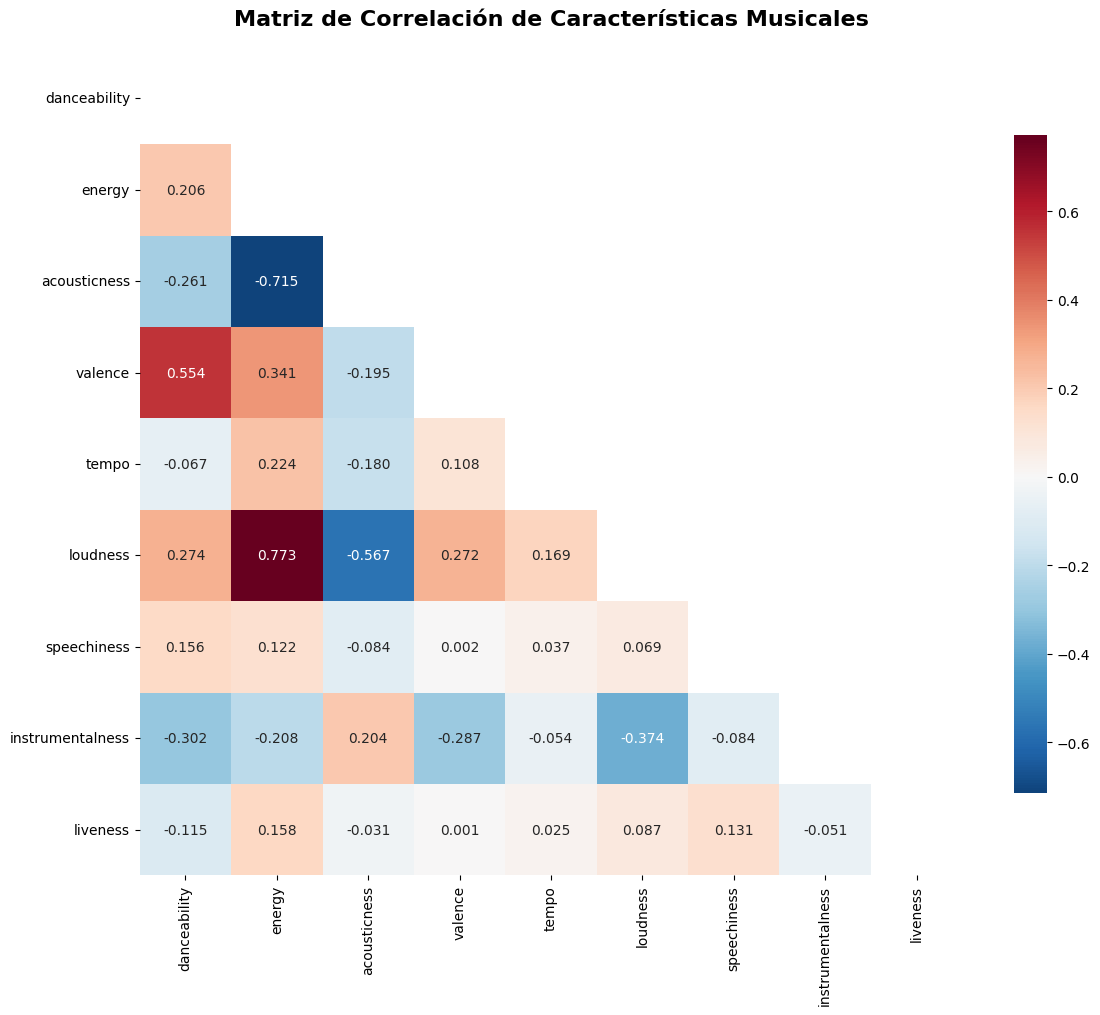


=== CORRELACIONES SIGNIFICATIVAS (|r| > 0.3) ===
energy - loudness: 0.773 (Positiva)
energy - acousticness: -0.715 (Negativa)
acousticness - loudness: -0.567 (Negativa)
danceability - valence: 0.554 (Positiva)
loudness - instrumentalness: -0.374 (Negativa)
energy - valence: 0.341 (Positiva)
danceability - instrumentalness: -0.302 (Negativa)

=== AN√ÅLISIS DE COVARIANZA ===
La covarianza mide c√≥mo var√≠an dos variables juntas:

Covarianza entre energy y loudness: 1.036764
‚úì Relaci√≥n positiva: cuando energy aumenta, loudness tiende a aumentar


In [55]:
# An√°lisis de correlaciones entre variables num√©ricas
print("=== AN√ÅLISIS DE CORRELACIONES ===")

# Seleccionar variables num√©ricas relevantes
correlation_cols = main_features + ['speechiness', 'instrumentalness', 'liveness']

# Calcular matriz de correlaci√≥n
correlation_matrix = dataset[correlation_cols].corr()

# Crear heatmap de correlaciones
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # M√°scara para mostrar solo la mitad inferior

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8})

plt.title('Matriz de Correlaci√≥n de Caracter√≠sticas Musicales', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Encontrar correlaciones m√°s altas (valor absoluto > 0.3)
print("\n=== CORRELACIONES SIGNIFICATIVAS (|r| > 0.3) ===")
high_correlations = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.3:
            high_correlations.append({
                'Variable_1': correlation_matrix.columns[i],
                'Variable_2': correlation_matrix.columns[j],
                'Correlaci√≥n': corr_value,
                'Abs_Correlaci√≥n': abs(corr_value),
                'Tipo': 'Positiva' if corr_value > 0 else 'Negativa'
            })

# Ordenar por valor absoluto de correlaci√≥n
high_correlations = sorted(high_correlations, key=lambda x: x['Abs_Correlaci√≥n'], reverse=True)

if high_correlations:
    for corr in high_correlations:
        print(f"{corr['Variable_1']} - {corr['Variable_2']}: {corr['Correlaci√≥n']:.3f} ({corr['Tipo']})")
else:
    print("No se encontraron correlaciones significativas entre las variables analizadas.")

# An√°lisis de covarianza
print(f"\n=== AN√ÅLISIS DE COVARIANZA ===")
print("La covarianza mide c√≥mo var√≠an dos variables juntas:")

# Ejemplo con las variables m√°s correlacionadas
if high_correlations:
    top_corr = high_correlations[0]
    var1, var2 = top_corr['Variable_1'], top_corr['Variable_2']
    
    covariance = np.cov(dataset[var1], dataset[var2])[0, 1]
    print(f"\nCovarianza entre {var1} y {var2}: {covariance:.6f}")
    
    if covariance > 0:
        print(f"‚úì Relaci√≥n positiva: cuando {var1} aumenta, {var2} tiende a aumentar")
    elif covariance < 0:
        print(f"‚úì Relaci√≥n negativa: cuando {var1} aumenta, {var2} tiende a disminuir")
    else:
        print(f"‚úì No hay relaci√≥n lineal entre las variables")

## Conclusiones del An√°lisis Exploratorio de Datos

### üìä **Hallazgos Principales**

#### **1. Calidad de los Datos**
- ‚úÖ **Dataset limpio**: No hay valores nulos ni filas duplicadas
- ‚ö†Ô∏è **Duplicados por canci√≥n**: 1,103 canciones duplicadas (mismo track y artist), pero esto es esperado ya que una canci√≥n puede aparecer en m√∫ltiples d√©cadas
- üìà **Tama√±o robusto**: 41,106 canciones con 19 caracter√≠sticas musicales

#### **2. Distribuci√≥n de la Variable Target (D√©cada)**
- üéµ **D√©cada m√°s representada**: 60s (21.02% - 8,642 canciones)
- üìâ **D√©cada menos representada**: 90s (13.43% - 5,520 canciones)
- ‚öñÔ∏è **Balance razonable**: Las diferencias entre d√©cadas no son extremas

#### **3. Caracter√≠sticas de las Variables Num√©ricas**

**Variables con distribuciones sim√©tricas:**
- `danceability`, `energy`, `valence`, `tempo`: Distribuciones aproximadamente normales
- `acousticness`: Ligeramente asim√©trica positiva
- `loudness`: Fuertemente asim√©trica negativa (muchas canciones con volumen moderado)

**Outliers detectados:**
- `loudness`: 3.27% de outliers (canciones muy silenciosas o muy ruidosas)
- `tempo`: 1.06% de outliers (canciones extremadamente lentas o r√°pidas)
- Otras variables tienen muy pocos outliers (<0.01%)

#### **4. Patrones Temporales (An√°lisis Bivariado)**

**Evoluci√≥n de caracter√≠sticas por d√©cada:**

üï∫ **Danceability**: Aumenta con el tiempo (60s: 0.492 ‚Üí 10s: 0.568)
‚ö° **Energy**: Los 60s tienen menor energ√≠a (0.445), pico en 00s (0.695)
üé∂ **Acousticness**: Declina dr√°sticamente (60s: 0.616 ‚Üí 00s-10s: ~0.21)
üòä **Valence**: Los 60s-70s son m√°s "felices" que d√©cadas posteriores

#### **5. Relaciones entre Variables (An√°lisis Multivariado)**

**Correlaciones m√°s fuertes encontradas:**

1. **Energy ‚Üî Loudness** (r = 0.773): Canciones m√°s energ√©ticas son m√°s ruidosas
2. **Energy ‚Üî Acousticness** (r = -0.715): A mayor energ√≠a, menor ac√∫stica
3. **Acousticness ‚Üî Loudness** (r = -0.567): Canciones ac√∫sticas son m√°s suaves
4. **Danceability ‚Üî Valence** (r = 0.554): Canciones bailables son m√°s alegres

### üéØ **Implicaciones para el Modelo de Machine Learning**

#### **Fortalezas del Dataset:**
- Caracter√≠sticas musicales muestran **patrones claros por d√©cada**
- **Correlaciones moderadas** entre variables (no hay multicolinealidad severa)
- **Distribuciones razonables** en la mayor√≠a de variables

#### **Desaf√≠os Identificados:**
- Algunas d√©cadas est√°n **ligeramente desbalanceadas**
- **Outliers en loudness y tempo** pueden requerir tratamiento
- Variables como `speechiness` e `instrumentalness` tienen **distribuciones muy sesgadas**

#### **Recomendaciones para Modelado:**
1. **Normalizaci√≥n/Escalado**: Necesario debido a diferentes rangos de variables
2. **Tratamiento de outliers**: Especialmente en `loudness` y `tempo`
3. **Feature engineering**: Las correlaciones sugieren que se podr√≠an crear caracter√≠sticas combinadas
4. **Balanceamiento**: Considerar t√©cnicas de balanceamiento entre d√©cadas si es necesario

### üîç **Pr√≥ximos Pasos**
El an√°lisis confirma que las caracter√≠sticas musicales de Spotify **s√≠ contienen informaci√≥n discriminativa** para clasificar canciones por d√©cada, especialmente:
- **Acousticness** (clara tendencia decreciente)
- **Energy** (patrones distintivos por era)
- **Danceability** (evoluci√≥n temporal)

Esto sugiere que un modelo de clasificaci√≥n tiene buenas probabilidades de √©xito para este problema.